In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("iris_svm.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
y = df["species"].values 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(kernel="linear", C=1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


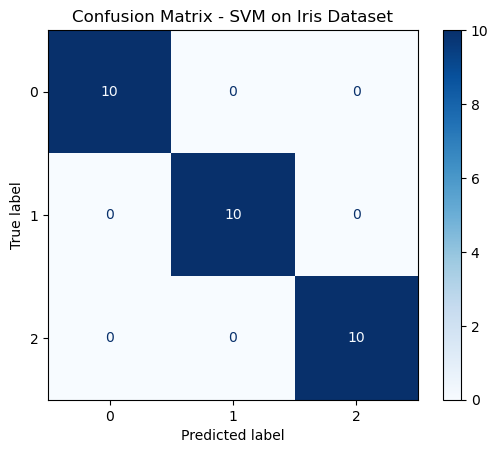

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM on Iris Dataset")
plt.show()

In [9]:
new_sample = np.array([[5.5, 3.0, 4.2, 1.3]])
predicted_species = model.predict(new_sample)[0]
print("Predicted Species:", predicted_species)

Predicted Species: 1


In [ ]:
import pickle

with open("iris_svm_model.pkl", "wb") as f:
    pickle.dump(model, f)